In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re
from pca import pca
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
train_data = pd.read_csv('npf_train.csv')

In [3]:
train_data

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,1,2000-01-01,nonevent,False,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
1,2,2000-01-20,nonevent,False,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2,3,2000-01-23,nonevent,False,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
3,4,2000-02-17,nonevent,False,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
4,5,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,454,2011-08-14,nonevent,False,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,...,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253
454,455,2011-08-16,nonevent,False,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
455,456,2011-08-18,nonevent,False,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,...,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391
456,457,2011-08-21,nonevent,False,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,...,14.421092,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457


In [4]:
def prepare_train_data(train_data):
    train_data["class4"] = train_data["class4"].astype("category")
    train_data["class2"] = train_data["class4"].apply(lambda c: "nonevent" if c == "nonevent" else "event")
    train_data["class2"].astype("category")
    return train_data.drop(columns = ["id", "date", "partlybad", "class4"])

In [5]:
train_data = prepare_train_data(train_data)

<Figure size 432x288 with 0 Axes>

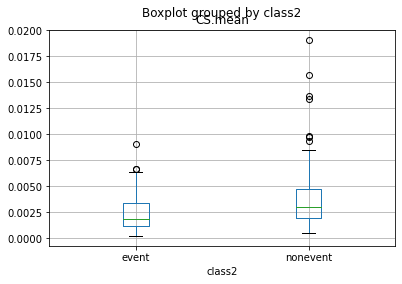

In [6]:
plt.clf()


train_data.boxplot(column="CS.mean",by="class2")
plt.show()

In [7]:
import re
train_data.columns

p = re.compile(r'.mean')
l1 = list(train_data.columns)
l2 = [ s for s in l1 if p.search(s) ]

In [8]:
from sklearn.decomposition import PCA

test_data = pd.read_csv('npf_test_hidden.csv')

In [9]:
train_data = pd.read_csv('npf_train.csv')
combined = pd.concat([test_data, train_data], ignore_index=True, sort=False)

In [10]:
combined.drop(columns =  ['id', 'date', 'partlybad', 'class4'], inplace=True)

In [11]:
combined

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,376.610169,0.526617,376.660339,0.500203,376.934655,0.564360,376.634746,0.471236,37.115592,24.180794,...,-2.851967,0.156421,-2.356066,0.174219,2.374336,1.318965,0.040709,0.024647,0.000644,0.000119
1,390.624932,0.453585,390.580694,0.455308,391.000685,0.505836,390.487945,0.481292,69.134531,59.895057,...,-18.646384,0.448865,-18.030984,0.478829,3.850439,2.056031,0.103446,0.060432,0.003707,0.000115
2,375.280258,1.249087,375.479806,1.241525,375.624129,1.423506,375.571474,1.200556,276.485371,201.722672,...,3.485822,1.526998,4.649689,1.978654,15.498463,11.001410,0.557332,0.494026,0.001637,0.000428
3,382.642176,3.222805,382.890412,3.026140,383.136941,3.466259,382.937706,2.837540,308.904304,287.444652,...,6.933127,3.737176,7.657725,3.823123,16.909366,13.924594,0.646806,0.602040,0.002480,0.000510
4,381.492971,4.386929,381.608000,4.333558,382.177784,4.491875,381.588857,4.263299,111.456879,104.807009,...,11.941411,2.195680,12.570801,2.458619,7.596930,6.722838,0.275559,0.312076,0.009429,0.004438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,377.507244,5.398886,270.743458,226.335210,...,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253
1419,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,131.474300,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
1420,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,386.336908,11.457833,108.311442,79.331814,...,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391
1421,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,10.932955,114.298822,99.583613,...,14.421092,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457


In [12]:
X = combined.values
X = StandardScaler().fit_transform(X)

In [13]:
pd.DataFrame(data=X, columns=combined.columns).head()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,-0.467394,-0.844612,-0.465849,-0.855498,-0.539915,-0.831325,-0.459270,-0.877020,-1.181806,-1.215169,...,-0.849598,-1.462316,-0.847318,-1.465281,-1.233250,-1.224186,-1.234651,-1.206725,-1.088916,-0.861887
1,0.791149,-0.866857,0.788687,-0.870212,0.767921,-0.844977,0.788855,-0.873412,-0.927701,-0.835214,...,-2.448010,-1.166384,-2.415477,-1.206999,-1.010478,-1.077425,-1.035026,-1.081267,0.296726,-0.867157
2,-0.586822,-0.624548,-0.572241,-0.612546,-0.661765,-0.630906,-0.555067,-0.615405,0.717856,0.673655,...,-0.208207,-0.075388,-0.146444,0.064719,0.747425,0.703743,0.409212,0.438854,-0.639969,-0.384403
3,0.074288,-0.023355,0.095621,-0.027678,0.036763,-0.154381,0.108605,-0.028201,0.975136,1.585630,...,0.140664,2.161159,0.154488,1.628664,0.960356,1.285795,0.693916,0.817535,-0.258542,-0.256845
4,-0.028912,0.331237,-0.019953,0.400799,-0.052418,0.084871,-0.012922,0.483234,-0.591826,-0.357407,...,0.647507,0.601273,0.646005,0.471686,-0.445063,-0.148189,-0.487373,-0.199037,2.885642,5.813905


In [14]:
# Covariance matrix to see how much different features correlate with each other
X_mean = np.mean(X, axis=0)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
pd.DataFrame(cov_mat, columns=combined.columns, index=combined.columns)

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
CO2168.mean,1.000703,-0.386401,1.000309,-0.378417,0.993767,-0.392768,0.999209,-0.374647,-0.468577,-0.505425,...,-0.609850,-0.350246,-0.609719,-0.370779,-0.488863,-0.511551,-0.492563,-0.506526,-0.094536,-0.140840
CO2168.std,-0.386401,1.000703,-0.393751,0.994142,-0.322882,0.939823,-0.404579,0.984663,0.287469,0.378860,...,0.668575,0.268802,0.659649,0.294143,0.362915,0.419854,0.464454,0.492143,0.361607,0.329746
CO2336.mean,1.000309,-0.393751,1.000703,-0.384789,0.992163,-0.400713,1.000260,-0.380083,-0.464225,-0.501538,...,-0.608532,-0.346818,-0.607740,-0.368539,-0.484578,-0.507928,-0.488859,-0.503444,-0.097535,-0.143369
CO2336.std,-0.378417,0.994142,-0.384789,1.000703,-0.316917,0.924511,-0.394879,0.992664,0.284801,0.373917,...,0.664133,0.273050,0.655604,0.291612,0.359224,0.414100,0.462027,0.488079,0.369056,0.335157
CO242.mean,0.993767,-0.322882,0.992163,-0.316917,1.000703,-0.305971,0.989614,-0.315268,-0.459422,-0.490591,...,-0.570876,-0.346498,-0.572489,-0.360353,-0.473645,-0.492582,-0.466862,-0.479057,-0.072032,-0.126197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UV_A.std,-0.511551,0.419854,-0.507928,0.414100,-0.492582,0.442923,-0.506239,0.405488,0.948508,0.989309,...,0.713232,0.778076,0.718562,0.819466,0.980744,1.000703,0.962709,0.971554,0.162364,0.246730
UV_B.mean,-0.492563,0.464454,-0.488859,0.462027,-0.466862,0.493180,-0.487540,0.454210,0.930494,0.943441,...,0.756088,0.756772,0.759443,0.799183,0.963002,0.962709,1.000703,0.990623,0.191241,0.243317
UV_B.std,-0.506526,0.492143,-0.503444,0.488079,-0.479057,0.519140,-0.502450,0.481101,0.902033,0.946271,...,0.778175,0.740545,0.781093,0.778733,0.945190,0.971554,0.990623,1.000703,0.205557,0.266826
CS.mean,-0.094536,0.361607,-0.097535,0.369056,-0.072032,0.325892,-0.102178,0.372212,0.112412,0.136465,...,0.365978,0.220206,0.361021,0.230022,0.141397,0.162364,0.191241,0.205557,1.000703,0.588457


In [15]:
model = pca(n_components=0.999)
out = model.fit_transform(combined)
strongest_predictors = out['topfeat'].query("type == 'best'")["feature"]
print(strongest_predictors)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [99.9%] explained variance using the [100] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [14] that covers the [99.90%] explained variance.
[pca] >The PCA reduction is performed on the [100] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
0          PAR.mean
1           SWS.std
2          SWS.mean
3          NET.mean
4          NET.mean
5       CO2504.mean
6          NET.mean
7          SWS.mean
8           SWS.std
9         RPAR.mean
10          NET.std
11       Pamb0.mean
12    RHIRGA672.std
13        Glob.mean
Name: feature, dtype: object


In [16]:
def ten_fold_cross_validate(model, X_train, y_train):
    cv = KFold(n_splits=10, shuffle=False)
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    return scores.mean(), scores.std()

In [17]:
def validate_models(models, model_names, X_train, y_train):
    result_data = np.zeros((len(models),2))
    for i in range(len(models)):
        scores = ten_fold_cross_validate(models[i], X_train, y_train)
        result_data[i][0] = scores[0]
        result_data[i][1] = scores[1]
    return pd.DataFrame(result_data, columns=["mean accuracy", "std"], index=model_names)

In [41]:
models = [
    LogisticRegression(max_iter=5000, class_weight="balanced"),
    RidgeClassifier(class_weight="balanced"),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(C=4.5, class_weight="balanced")
]
model_names = [re.search(r"(?:').*(?:')", str(type(model))).group(0) for model in models]

In [ ]:
train_data = prepare_train_data(pd.read_csv("npf_train.csv"))
X_train = StandardScaler().fit_transform(train_data.drop(columns=["class2"]))
y_train = train_data["class2"]

print("10-fold cross validation with all feature columns:")
validate_models(models, model_names, X_train, y_train)

10-fold cross validation with all feature columns:


In [20]:
X_train = StandardScaler().fit_transform(train_data[strongest_predictors])
print("10-fold cross validation with strongest predictors:")
validate_models(models, model_names, X_train, y_train)

10-fold cross validation with strongest predictors:


,mean accuracy,std
'sklearn.linear_model._logistic.LogisticRegression',0.766329,0.075086
'sklearn.linear_model._ridge.RidgeClassifier',0.777488,0.082358
'sklearn.ensemble._forest.RandomForestClassifier',0.744686,0.080729
'sklearn.neighbors._classification.KNeighborsClassifier',0.744686,0.083038
'sklearn.svm._classes.SVC',0.768599,0.091041
